In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
path = '~/galvanize/Capstone_1/git_info_wine_ratings/data/winemag-data-130k-v2.csv'
df = pd.read_csv(path, header = 'infer', sep = ',', index_col = 0)

In [3]:
print(df['country'].value_counts()[:10])

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64


In [4]:
ten_most_counted = df[['country','description']].groupby('country').count().sort_values('description', ascending = False).reset_index().head(10)
ten_least_counted = df[['country','description']].groupby('country').count().sort_values('description', ascending = True).reset_index().head(10)

In [5]:
def replace_val(df, index, col, string):
    '''
        parameters:
        unclean_df = dataframe
        index = integer row index where you wish to replace a value
        col = string col where value needs replacement
        string = what to replace in index:col
        
        return dataframe with replaced value
    '''
    df.loc[index,col] = string
    return df
              

replace_val(ten_least_counted ,4, 'country', 'Bosnia')

,country,description
0,China,1
1,Slovakia,1
2,Egypt,1
3,Armenia,2
4,Bosnia,2
5,Luxembourg,6
6,Switzerland,7
7,India,9
8,Cyprus,11
9,Czech Republic,12


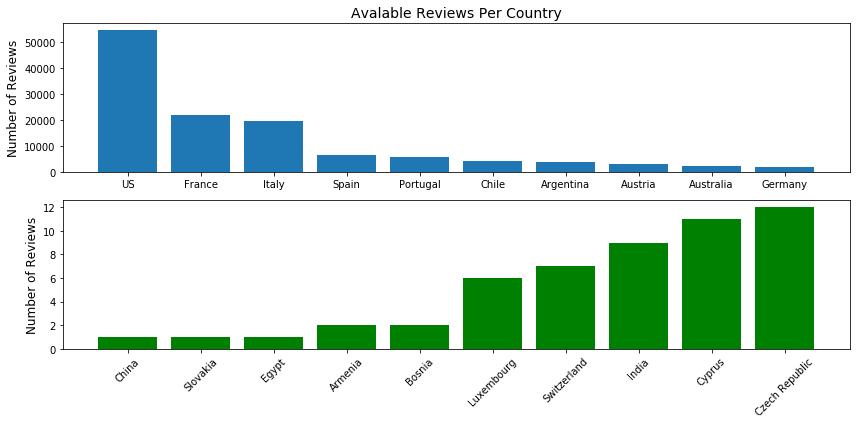

In [8]:

fig, axs = plt.subplots(2,1, figsize= (12,6))
axs[0].set_title('Avalable Reviews Per Country', fontsize = 14)
axs[0].bar(x = 'country', height = 'description', data = ten_most_counted)
axs[0].set_ylabel('Number of Reviews', fontsize = 12)
axs[1].bar(x = 'country', height = 'description', data = ten_least_counted, align = 'center', color = 'green')
axs[1].set_ylabel('Number of Reviews', fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_least_rated_bar.png')
plt.show();

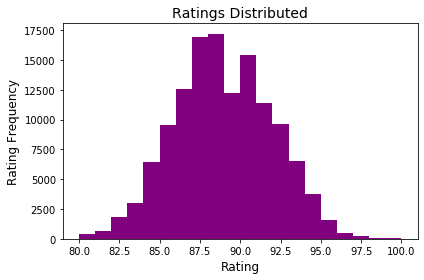

In [10]:
fig, ax = plt.subplots(1)
ax.hist(df['points'], bins = 20, color = 'purple')
ax.set_title('Ratings Distributed', fontsize = 14)
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Rating Frequency', fontsize = 12)
plt.tight_layout()
plt.savefig('Original_rate_dist.png')
plt.show();

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [212]:
#Droping nan prices for price distribution
test_df = df[['country', 'price', 'description', 'points']]
test_df.dropna(axis = 0, how = 'any', subset = ['price'], inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120975 entries, 1 to 129970
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120916 non-null  object 
 1   price        120975 non-null  float64
 2   description  120975 non-null  object 
 3   points       120975 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


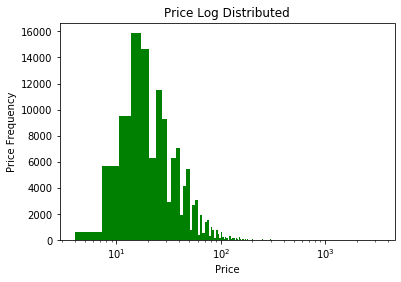

In [191]:
fig, ax = plt.subplots(1)
ax.hist(df['price'], bins = 1000, color = 'green')
ax.set_title('Price Log Distributed')
ax.set_xlabel('Price')
ax.set_ylabel('Price Frequency')
ax.set_xscale('log')
plt.savefig('price_log_dist.png')
plt.show();

In [208]:
us_price = test_df['price'][test_df['country']=='US']
it_price = test_df['price'][test_df['country']=='Italy']
fr_price = test_df['price'][test_df['country']=='France']
sp_price = test_df['price'][test_df['country']=='Spain']
por_price = test_df['price'][test_df['country']=='Portugal']

count_data = [us_price, it_price, fr_price, sp_price, por_price]
count_lst = ['US', 'Italy', 'France', 'Spain', 'Portugal']

In [5]:
df.sort_values('price', ascending = False).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair


In [221]:
#look at price plots based on above and below mean rating of 88 points
below_mean_points = test_df['price'][test_df['points']>88]
having_mean = test_df['price'][test_df['points'] == 88]
above_mean_points = test_df['price'][test_df['points']<88]

median_rating_diff = [below_mean_points, having_mean, above_mean_points]
ratings = ['Rating Above 88','Rating At 88', 'Rating Below 88']

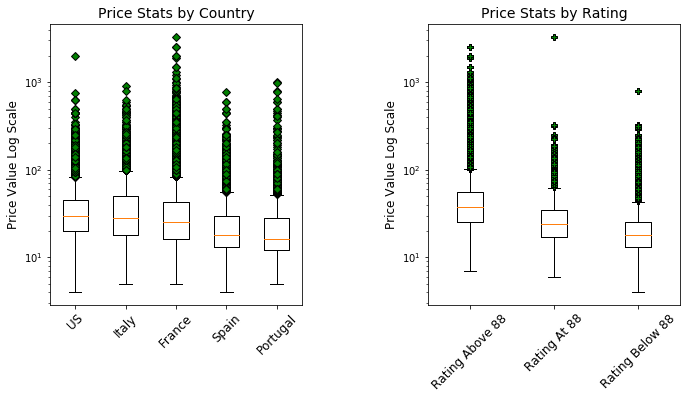

In [231]:
green_plus = dict(markerfacecolor='g', marker='P')
green_diamond = dict(markerfacecolor='g', marker='D')
fig, axs = plt.subplots(1,2, figsize=(10, 6))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25, wspace = 0.5)

axs[0].boxplot(count_data,flierprops=green_diamond,)
axs[0].set_xticklabels(np.repeat(count_lst, 1),
                    rotation=45, fontsize=12)
axs[0].set_title('Price Stats by Country', fontsize = 14)
axs[0].set_ylabel('Price Value Log Scale', fontsize = 12)
axs[0].set_yscale('log')
axs[1].boxplot(median_rating_diff, flierprops=green_plus,)
axs[1].set_xticklabels(np.repeat(ratings, 1),
                       rotation = 45, fontsize=12)
axs[1].set_title('Price Stats by Rating', fontsize = 14)
axs[1].set_ylabel('Price Value Log Scale', fontsize = 12)
axs[1].set_yscale('log')
plt.savefig('price_box.png')
plt.show();